In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv('../../Dataset/home-data-for-ml-course/train.csv')
test_data = pd.read_csv('../../Dataset/home-data-for-ml-course/test.csv')

In [3]:
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data.SalePrice
train_data.drop(['SalePrice'], axis=1, inplace=True)

In [4]:
# Select numerical colums only
numerical_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64']]
X = train_data[numerical_cols].copy()
X_test = test_data[numerical_cols].copy()

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

my_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy='constant')), ('model', RandomForestRegressor(n_estimators=100, random_state=0))])

In [6]:
from sklearn.model_selection import cross_val_score

scores = -1 * cross_val_score(my_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')
print("Average MAE score:", scores.mean())

Average MAE score: 18092.453520547944


### Step1: Write a useful function

In [7]:
def get_score(n_estimators):
    
    my_pipeline = Pipeline(steps = [('impute', SimpleImputer()), ('model', RandomForestRegressor(n_estimators, random_state=0))])
    scores = -1 * cross_val_score(my_pipeline, X, y, cv=3, scoring='neg_mean_absolute_error')
    return scores.mean()

### Step2: Test different parameter values

In [ ]:
estimator_values = [50, 100, 150, 200, 250, 300, 350, 400]

results = {}
for i in estimator_values:
    results[i] = get_score(i)

In [8]:
results = {}
for i in range(1,12):
    results[50*i] = get_score(50*i)

### Step3: Visualize the results of Cross-Validation

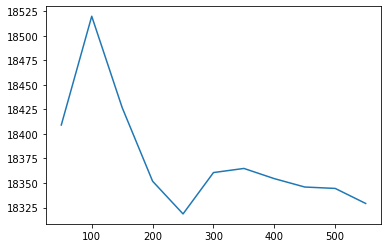

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [10]:
t = min(results.values())

In [12]:
key = [k for k, v in results.items() if v == t]

In [14]:
n_estimators = min(results, key=results.get)

In [15]:
n_estimators

250